In [4]:
import pandas as pd 
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go 
import numpy  as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
df_concorrencia = pd.read_excel('base_concorrência_sp_sprm_V2.xlsx')

In [ ]:
#Dados do Geoimóvel - Produtos de SP com preço médio de acima de 90K e menor que 300K

In [8]:
df_concorrencia.head()

,CONSTRUTORA,EMPRESA,REGIAO,UF,CIDADE,EMPREENDIMENTO,ANO_PESQUISA,DT_PESQUISA,DT_LANCAMENTO,PM,VSO,UM_DISP,ESTOQUE
0,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,AGUAS CLARAS,2020,2020-12-14,2020-09-01,191083,147,348,201
1,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,ALTOS DE ITAQUERA,2020,2020-12-14,2019-06-01,147997,395,396,1
2,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,ALTOS DE ITAQUERA,2019,2019-12-16,2019-06-01,156063,129,396,267
3,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,AURORA,2019,2019-12-17,2018-08-01,157740,399,400,1
4,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,AURORA,2020,2020-06-12,2018-08-01,159284,400,400,0


In [9]:
df_concorrencia['chave_prd'] = df_concorrencia.EMPRESA +"- " + df_concorrencia.EMPREENDIMENTO +"-"+df_concorrencia.ANO_PESQUISA.astype(str) 

In [10]:
df_concorrencia.EMPRESA.drop_duplicates().values

array(['TENDA', 'CURY', 'DIRECIONAL', 'MRV', 'PLANO E PLANO', 'VIVAZ'],
      dtype=object)

In [11]:
df_concorrencia.EMPRESA.nunique()

6

In [12]:
df_concorrencia.EMPREENDIMENTO.nunique()

198

In [ ]:
#Verificando distribuição de Preço e VSO

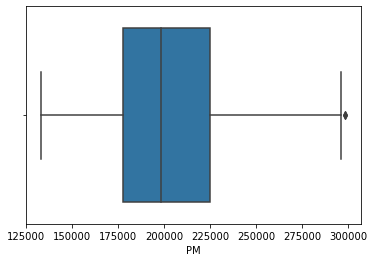

In [13]:
sns.boxplot(df_concorrencia.PM)

In [104]:
sns.boxplot(df_concorrencia.VSO)

In [ ]:
#Filtrando produtos com mais de 10 unidades em estoque

In [14]:
mask_estoque = df_concorrencia.ESTOQUE > 10 

In [15]:
df_concorrencia_filtro = df_concorrencia.loc[mask_estoque].groupby(['EMPRESA','chave_prd','ANO_PESQUISA'],as_index=False).agg({'PM':'mean',
                                                                                                             'VSO':'sum',
                                                                                                             'UM_DISP':'sum',                
                                                                                                             'ESTOQUE':'sum'})

In [16]:
x = df_concorrencia_filtro[['PM']]

In [ ]:
#Defininco nº de Clusters

1 133905701759.76395
2 44376355652.490105
3 22563537371.83974
4 14861795730.04249
5 10584942856.908373
6 7780958859.3420925
7 6067846310.116632
8 3919142791.152129
9 3515474665.6828194
10 2479912214.172494


<IPython.core.display.Javascript object>


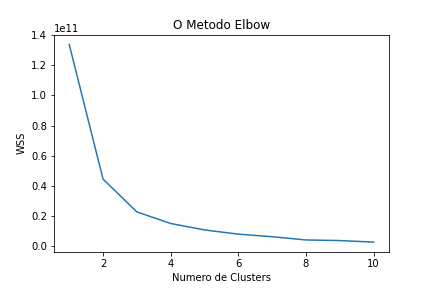

In [23]:
#definir o número de grupos de agentes ideal
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(x)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'random', random_state=28)
kmeans.fit(x)
distance = kmeans.fit_transform(x)

<IPython.core.display.Javascript object>


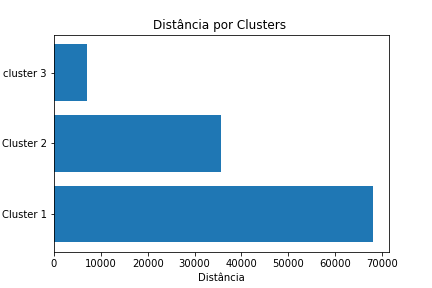

In [24]:
%matplotlib notebook
l = ['Cluster 1','Cluster 2', 'cluster 3']
plt.barh(l,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

In [25]:
x['Cluster'] = kmeans.labels_

<ipython-input-25-43eca371b81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = kmeans.labels_


In [26]:
kmeans.labels_

array([2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1])

In [27]:
x.groupby('Cluster')['PM'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,56.00,"227,040.02","14,426.98","211,180.00","216,968.00","223,300.00","231,175.00","295,920.00"
1,74.00,"194,655.37","7,905.28","182,041.00","189,006.00","193,500.00","201,276.75","210,400.00"
2,64.00,"165,983.29","10,199.55","133,000.00","161,577.50","168,058.00","172,367.38","180,000.00"


In [ ]:
#Renomeando Cluster

In [28]:
nomes = {2:'Mass',
         1: 'Masstige',
         0: 'Prestige'}

In [29]:
x['nome_cluster'] = x.Cluster.map(nomes)

<ipython-input-29-9f9ef7cc84ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nome_cluster'] = x.Cluster.map(nomes)


In [30]:
df_concorrencia_filtro['nome_cluster'] = x['nome_cluster']

In [31]:
df_concorrencia_filtro.head()

,EMPRESA,chave_prd,ANO_PESQUISA,PM,VSO,UM_DISP,ESTOQUE,nome_cluster
0,CURY,CURY- DEZ ANHAIA MELLO-2019,2019,"159,000.00",62,110,48,Mass
1,CURY,CURY- DEZ CURSINO-2019,2019,"200,256.50",112,337,225,Masstige
2,CURY,CURY- DEZ CURSINO-2020,2020,"217,129.00",187,202,15,Prestige
3,CURY,CURY- DEZ GAMELINHA 2-2019,2019,"205,014.50",192,390,198,Masstige
4,CURY,CURY- DEZ GAMELINHA 2-2020,2020,"241,331.00",73,93,20,Prestige


In [32]:
df_concorrencia_filtro.groupby('nome_cluster')['PM'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Mass,64.00,"165,983.29","10,199.55","133,000.00","161,577.50","168,058.00","172,367.38","180,000.00"
Masstige,74.00,"194,655.37","7,905.28","182,041.00","189,006.00","193,500.00","201,276.75","210,400.00"
Prestige,56.00,"227,040.02","14,426.98","211,180.00","216,968.00","223,300.00","231,175.00","295,920.00"


In [33]:
pd.pivot_table(df_concorrencia_filtro, values=['chave_prd', 'PM','VSO','UM_DISP','ESTOQUE'], index=['EMPRESA','ANO_PESQUISA','nome_cluster'],
                    aggfunc={
                             'PM': np.mean,
                             'UM_DISP': np.sum,
                             'VSO': np.sum,
                             'ESTOQUE': np.sum, 
                             'chave_prd': np.size}).round(2)

ESTOQUE         PM  UM_DISP   VSO  \
EMPRESA       ANO_PESQUISA nome_cluster                                      
CURY          2019         Mass              185 168,603.60      805   620   
                           Masstige         1488 197,593.19     3186  1698   
                           Prestige          223 227,191.00      333   110   
              2020         Mass              223 179,251.00      490   267   
                           Masstige          260 197,555.58     1183   923   
                           Prestige         1036 222,475.60     2022   986   
DIRECIONAL    2019         Masstige          315 197,000.00      780   465   
                           Prestige          328 219,050.00      678   350   
              2020         Mass              184 180,000.00      216    32   
                           Masstige          114 202,250.00      414   300   
                           Prestige           13 226,300.00      188   175   
MRV           2019         Mass             1031 164,098.67     2055  1024   
                           Masstige          749 193,600.00     1294   545   
                           Prestige          893 234,047.00     2728  1835   
              2020         Mass              784 166,238.33     2477  1693   
                           Masstige         1281 196,825.00     2425  1144   
                           Prestige          902 230,937.50     2601  1699   
PLANO E PLANO 2019         Mass             2033 167,501.36     3775  1742   
                           Masstige         2860 195,857.69     4479  1619   
                           Prestige         1459 225,564.39     2408   949   
              2020         Mass             2502 169,752.35     2779   277   
                           Masstige         3545 188,881.66     5812  2267   
                           Prestige         2949 223,006.18     4819  1870   
TENDA         2019         Mass             1483 155,813.50     2680  1197   
                           Masstige          280 186,853.00      611   331   
              2020         Mass             1049 166,819.90     3330  2281   
                           Masstige          916 194,250.00     1535   619   
VIVAZ         2019         Mass              438 172,494.50      480    42   
                           Masstige         1654 201,267.72     2179   525   
                           Prestige          725 218,428.33      823    98   
              2020         Mass              173 158,630.00      351   178   
                           Masstige         1462 194,749.36     2375   913   
                           Prestige          831 230,734.74     2317  1486   

                                         chave_prd  
EMPRESA       ANO_PESQUISA nome_cluster             
CURY          2019         Mass                  5  
                           Masstige              9  
                           Prestige              1  
              2020         Mass                  1  
                           Masstige              4  
                           Prestige              5  
DIRECIONAL    2019         Masstige              2  
                           Prestige              2  
              2020         Mass                  1  
                           Masstige              1  
                           Prestige              1  
MRV           2019         Mass                  9  
                           Masstige              3  
                           Prestige             10  
              2020         Mass                  8  
                           Masstige              8  
                           Prestige              8  
PLANO E PLANO 2019         Mass                 12  
                           Masstige             14  
                           Prestige              7  
              2020         Mass                  8  
                           Masstige             17  
                           Prestige   

In [34]:
df_concorrencia_filtro

,EMPRESA,chave_prd,ANO_PESQUISA,PM,VSO,UM_DISP,ESTOQUE,nome_cluster
0,CURY,CURY- DEZ ANHAIA MELLO-2019,2019,"159,000.00",62,110,48,Mass
1,CURY,CURY- DEZ CURSINO-2019,2019,"200,256.50",112,337,225,Masstige
2,CURY,CURY- DEZ CURSINO-2020,2020,"217,129.00",187,202,15,Prestige
3,CURY,CURY- DEZ GAMELINHA 2-2019,2019,"205,014.50",192,390,198,Masstige
4,CURY,CURY- DEZ GAMELINHA 2-2020,2020,"241,331.00",73,93,20,Prestige
...,...,...,...,...,...,...,...,...
189,VIVAZ,VIVAZ- VIVAZ TRANSAMERICA 2-2020,2020,"191,200.50",41,356,315,Masstige
190,VIVAZ,VIVAZ- VIVAZ TRANSAMERICA-2019,2019,"221,090.00",1,444,443,Prestige
191,VIVAZ,VIVAZ- VIVAZ TRANSAMERICA-2020,2020,"203,416.50",239,356,117,Masstige
192,VIVAZ,VIVAZ- VIVAZ VILA GUILHERME-2020,2020,"191,748.00",197,595,398,Masstige


In [35]:
df_param_cluster = df_concorrencia_filtro.groupby(['EMPRESA','ANO_PESQUISA', 'nome_cluster'],as_index= False).agg({'chave_prd':'count',
                                                                                'PM': 'mean',
                                                                                'VSO': 'sum',
                                                                                 'UM_DISP':'sum',
                                                                                'ESTOQUE': 'sum'}).round(2)

In [ ]:
#Base Final Clusterizada

In [36]:
df_param_cluster

,EMPRESA,ANO_PESQUISA,nome_cluster,chave_prd,PM,VSO,UM_DISP,ESTOQUE
0,CURY,2019,Mass,5,"168,603.60",620,805,185
1,CURY,2019,Masstige,9,"197,593.19",1698,3186,1488
2,CURY,2019,Prestige,1,"227,191.00",110,333,223
3,CURY,2020,Mass,1,"179,251.00",267,490,223
4,CURY,2020,Masstige,4,"197,555.58",923,1183,260
5,CURY,2020,Prestige,5,"222,475.60",986,2022,1036
6,DIRECIONAL,2019,Masstige,2,"197,000.00",465,780,315
7,DIRECIONAL,2019,Prestige,2,"219,050.00",350,678,328
8,DIRECIONAL,2020,Mass,1,"180,000.00",32,216,184
9,DIRECIONAL,2020,Masstige,1,"202,250.00",300,414,114


In [37]:
%matplotlib inline

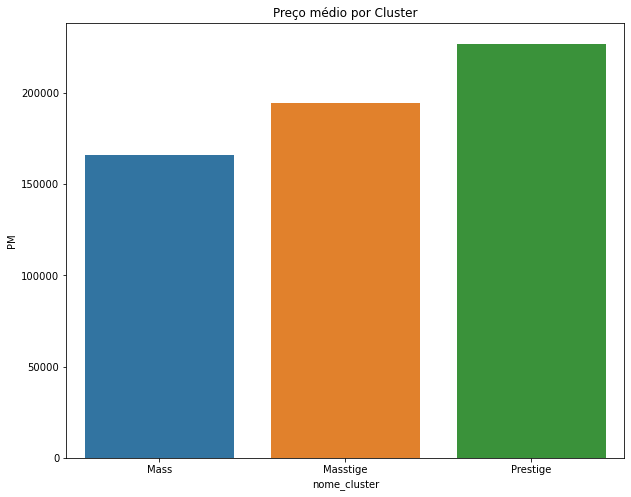

In [38]:
plt.subplots(1,figsize=(10,8))
sns.barplot(data = df_concorrencia_filtro.groupby('nome_cluster',as_index= False).PM.mean(),
           x = 'nome_cluster', y = 'PM')
plt.title('Preço médio por Cluster');

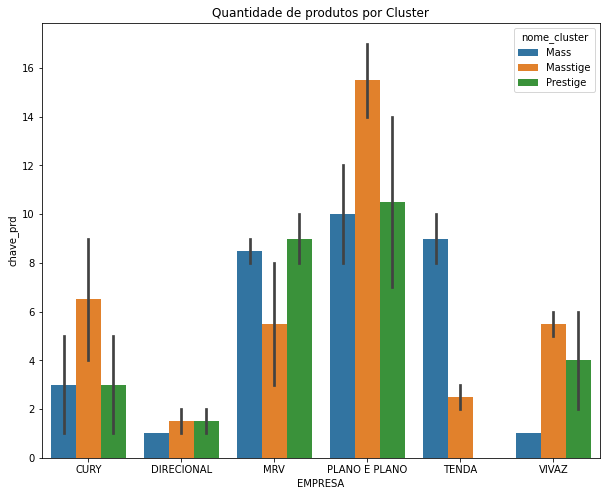

In [39]:
plt.subplots(1,figsize=(10,8))
sns.barplot(data = df_param_cluster, x = df_param_cluster['EMPRESA'],
            y = 'chave_prd', hue = 'nome_cluster')
plt.title('Quantidade de produtos por Cluster');

In [41]:
df_param_cluster.to_csv('clustertenda_concorrencia_v4.csv',sep=';',decimal=',')